In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

import matplotlib
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

In [2]:
PLOT_TITLES = ['Exponential', 'Hyperbolic']

FONT_SIZE_1 = 15
FONT_SIZE_2 = 14
FONT_SIZE_3 = 11

In [3]:
original_cmap = sns.diverging_palette(10, 150, as_cmap=True, s=80, l=40)
num_colors = 256
shift_factor = 0.7
num_lower_pos = int(num_colors * shift_factor)
lower_pos = np.linspace(0, 0.5, num_lower_pos)
upper_pos = np.linspace(0.5, 1, num_colors - num_lower_pos)
new_positions = np.concatenate((lower_pos, upper_pos))
COLOR_BAR = LinearSegmentedColormap.from_list("shifted_cmap", original_cmap(new_positions))

In [4]:
def plot_recovery_heatmap(data_list, param_names, model_names, x_label, color_bar_pos, wspace, plot_name):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={'width_ratios': [1, 1], 'wspace': wspace})
    for i, ax in enumerate(axes):
        sns.heatmap(
            data_list[i], annot=True, fmt='.2f', annot_kws={"size": FONT_SIZE_3},
            yticklabels=param_names if i == 0 else [],
            xticklabels=model_names, cmap=COLOR_BAR, ax=ax, vmin=0, vmax=1,
            cbar=False, square=True
        )
        ax.set_title(PLOT_TITLES[i], fontsize=FONT_SIZE_1, pad=10)
        if i == 0:
            ax.set_ylabel('Parameter', fontsize=FONT_SIZE_2)
        else:
            ax.set_ylabel('')
        ax.set_xlabel(x_label, fontsize=FONT_SIZE_2)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE_3)
    # Add a single color bar for the entire figure
    cbar_ax = fig.add_axes(color_bar_pos)  # [left, bottom, width, height]
    norm = plt.Normalize(vmin=0, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=COLOR_BAR, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cbar_ax, orientation='vertical')
    # Remove the outline of the color bar
    cbar.outline.set_visible(False)
    # Adjust the font size of the numbers on the color bar
    cbar.ax.tick_params(labelsize=FONT_SIZE_3)

    plt.savefig(
        f'{plot_name}.pdf',
        transparent=True, dpi=600,
        bbox_inches='tight'
    )

In [5]:
def r2_matrix(u60, u40, u20,
              o60, o40, o20):
    return np.array([
        [
            r2_score(u60[:, 0], u60[:, 1]),
            r2_score(u40[:, 0], u40[:, 1]),
            r2_score(u20[:, 0], u20[:, 1]),
            r2_score(o20[:, 0], o20[:, 1]),
            r2_score(o40[:, 0], o40[:, 1]),
            r2_score(o60[:, 0], o60[:, 1]),
        ],
        [
            r2_score(u60[:, 2], u60[:, 3]),
            r2_score(u40[:, 2], u40[:, 3]),
            r2_score(u20[:, 2], u20[:, 3]),
            r2_score(o20[:, 2], o20[:, 3]),
            r2_score(o60[:, 2], o60[:, 3]),
            r2_score(o40[:, 2], o40[:, 3]),
        ],
        [
            r2_score(u60[:, 4], u60[:, 5]),
            r2_score(u40[:, 4], u40[:, 5]),
            r2_score(u20[:, 4], u20[:, 5]),
            r2_score(o20[:, 4], o20[:, 5]),
            r2_score(o40[:, 4], o40[:, 5]),
            r2_score(o60[:, 4], o60[:, 5]),
        ],
        [
            r2_score(u60[:, -2], u60[:, -1]),
            r2_score(u40[:, -2], u40[:, -1]),
            r2_score(u20[:, -2], u20[:, -1]),
            r2_score(o20[:, -2], o20[:, -1]),
            r2_score(o40[:, -2], o40[:, -1]),
            r2_score(o60[:, -2], o60[:, -1]),
        ],
        [
            r2_score(u60[:, 6], u60[:, 7]),
            r2_score(u40[:, 6], u40[:, 7]),
            r2_score(u20[:, 6], u20[:, 7]),
            r2_score(o20[:, 6], o20[:, 7]),
            r2_score(o40[:, 6], o40[:, 7]),
            r2_score(o60[:, 6], o60[:, 7]),
        ]
    ])

In [6]:
def corr_matrix(u60, u40, u20,
              o60, o40, o20):
    return np.array([
        [
            pearsonr(u60[:, 0], u60[:, 1])[0],
            pearsonr(u40[:, 0], u40[:, 1])[0],
            pearsonr(u20[:, 0], u20[:, 1])[0],
            pearsonr(o20[:, 0], o20[:, 1])[0],
            pearsonr(o40[:, 0], o40[:, 1])[0],
            pearsonr(o60[:, 0], o60[:, 1])[0],
        ],
        [
            pearsonr(u60[:, 2], u60[:, 3])[0],
            pearsonr(u40[:, 2], u40[:, 3])[0],
            pearsonr(u20[:, 2], u20[:, 3])[0],
            pearsonr(o20[:, 2], o20[:, 3])[0],
            pearsonr(o60[:, 2], o60[:, 3])[0],
            pearsonr(o40[:, 2], o40[:, 3])[0],
        ],
        [
            pearsonr(u60[:, 4], u60[:, 5])[0],
            pearsonr(u40[:, 4], u40[:, 5])[0],
            pearsonr(u20[:, 4], u20[:, 5])[0],
            pearsonr(o20[:, 4], o20[:, 5])[0],
            pearsonr(o40[:, 4], o40[:, 5])[0],
            pearsonr(o60[:, 4], o60[:, 5])[0],
        ],
        [
            pearsonr(u60[:, -2], u60[:, -1])[0],
            pearsonr(u40[:, -2], u40[:, -1])[0],
            pearsonr(u20[:, -2], u20[:, -1])[0],
            pearsonr(o20[:, -2], o20[:, -1])[0],
            pearsonr(o40[:, -2], o40[:, -1])[0],
            pearsonr(o60[:, -2], o60[:, -1])[0],
        ],
        [
            pearsonr(u60[:, 6], u60[:, 7])[0],
            pearsonr(u40[:, 6], u40[:, 7])[0],
            pearsonr(u20[:, 6], u20[:, 7])[0],
            pearsonr(o20[:, 6], o20[:, 7])[0],
            pearsonr(o40[:, 6], o40[:, 7])[0],
            pearsonr(o60[:, 6], o60[:, 7])[0],
        ]
    ])

In [7]:
exp_u60 = pd.read_csv('_data/Exponential_rec_under_60.csv', index_col=0).to_numpy()
exp_u40 = pd.read_csv('_data/Exponential_rec_under_40.csv', index_col=0).to_numpy()
exp_u20 = pd.read_csv('_data/Exponential_rec_under_20.csv', index_col=0).to_numpy()
exp_o20 = pd.read_csv('_data/Exponential_rec_over_20.csv', index_col=0).to_numpy()
exp_o40 = pd.read_csv('_data/Exponential_rec_over_40.csv', index_col=0).to_numpy()
exp_o60 = pd.read_csv('_data/Exponential_rec_over_60.csv', index_col=0).to_numpy()

hyp_u60 = pd.read_csv('_data/Hyperbolic_rec_under_60.csv', index_col=0).to_numpy()
hyp_u40 = pd.read_csv('_data/Hyperbolic_rec_under_40.csv', index_col=0).to_numpy()
hyp_u20 = pd.read_csv('_data/Hyperbolic_rec_under_20.csv', index_col=0).to_numpy()
hyp_o20 = pd.read_csv('_data/Hyperbolic_rec_over_20.csv', index_col=0).to_numpy()
hyp_o40 = pd.read_csv('_data/Hyperbolic_rec_over_40.csv', index_col=0).to_numpy()
hyp_o60 = pd.read_csv('_data/Hyperbolic_rec_over_60.csv', index_col=0).to_numpy()

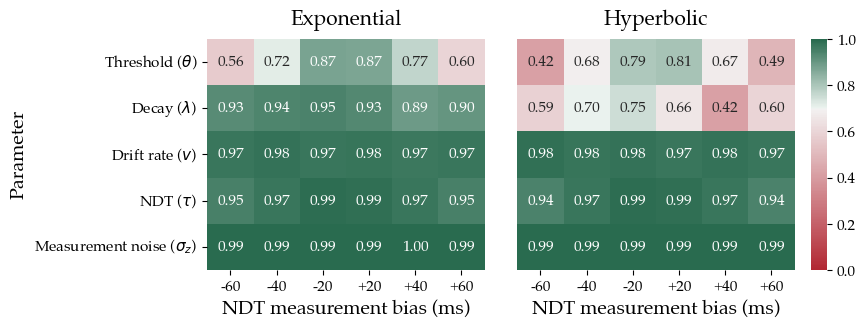

In [8]:
r2_exp = r2_matrix(exp_u60, exp_u40, exp_u20, 
                   exp_o60, exp_o40, exp_o20)

r2_hyp = r2_matrix(hyp_u60, hyp_u40, hyp_u20, 
                   hyp_o60, hyp_o40, hyp_o20)

data_list = [r2_exp, r2_hyp]

param_names = [
    r'Threshold ($\theta$)', r'Decay ($\lambda$)',
    r'Drift rate ($v$)', r'NDT ($\tau$)', r'Measurement noise ($\sigma_z$)',
]
model_names = [
    r'-60', r'-40', r'-20',
    r'+20', r'+40', r'+60',
]
x_label = 'NDT measurement bias (ms)'
color_bar_pos = [0.9, 0.11, 0.02, 0.77]
wspace = 0.0


plot_recovery_heatmap(
    data_list, param_names, model_names, x_label, color_bar_pos, wspace, 'measurement_bais_r2'
)


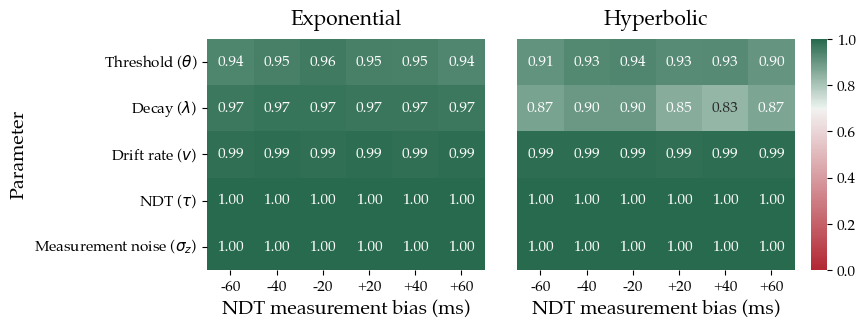

In [9]:
corr_exp = corr_matrix(exp_u60, exp_u40, exp_u20, 
                       exp_o60, exp_o40, exp_o20)

corr_hyp = corr_matrix(hyp_u60, hyp_u40, hyp_u20, 
                       hyp_o60, hyp_o40, hyp_o20)

data_list = [corr_exp, corr_hyp]

param_names = [
    r'Threshold ($\theta$)', r'Decay ($\lambda$)',
    r'Drift rate ($v$)', r'NDT ($\tau$)', r'Measurement noise ($\sigma_z$)',
]
model_names = [
    r'-60', r'-40', r'-20',
    r'+20', r'+40', r'+60',
]
x_label = 'NDT measurement bias (ms)'
color_bar_pos = [0.9, 0.11, 0.02, 0.77]
wspace = 0.0


plot_recovery_heatmap(
    data_list, param_names, model_names, x_label, color_bar_pos, wspace, 'measurement_bais_corr'
)


In [10]:
def make_df(true_prms, estimated_prms):
    x = ['-60', '-40', '-20', '+20', '+40', '+60']
    diff = np.array([])
    bias = []
    
    for i in range(len(true_prms)):
        diff = np.append(diff, estimated_prms[i] - true_prms[i])
        bias += [x[i]]*len(true_prms[i])
        
    return pd.DataFrame({'diff':diff,
                         'bias':bias})

In [11]:
df_exp_threshold = make_df([exp_u60[:, 0], exp_u40[:, 0], exp_u20[:, 0],
                            exp_o20[:, 0], exp_o40[:, 0], exp_o60[:, 0]],
                           [exp_u60[:, 1], exp_u40[:, 1], exp_u20[:, 1],
                            exp_o20[:, 1], exp_o40[:, 1], exp_o60[:, 1]])

df_hyp_threshold = make_df([hyp_u60[:, 0], hyp_u40[:, 0], hyp_u20[:, 0],
                            hyp_o20[:, 0], hyp_o40[:, 0], hyp_o60[:, 0]],
                           [hyp_u60[:, 1], hyp_u40[:, 1], hyp_u20[:, 1],
                            hyp_o20[:, 1], hyp_o40[:, 1], hyp_o60[:, 1]])

df_exp_decay = make_df([exp_u60[:, 2], exp_u40[:, 2], exp_u20[:, 2],
                        exp_o20[:, 2], exp_o40[:, 2], exp_o60[:, 2]],
                       [exp_u60[:, 3], exp_u40[:, 3], exp_u20[:, 3],
                        exp_o20[:, 3], exp_o40[:, 3], exp_o60[:, 3]])

df_hyp_decay = make_df([hyp_u60[:, 2], hyp_u40[:, 2], hyp_u20[:, 2],
                        hyp_o20[:, 2], hyp_o40[:, 2], hyp_o60[:, 2]],
                       [hyp_u60[:, 3], hyp_u40[:, 3], hyp_u20[:, 3],
                        hyp_o20[:, 3], hyp_o40[:, 3], hyp_o60[:, 3]])

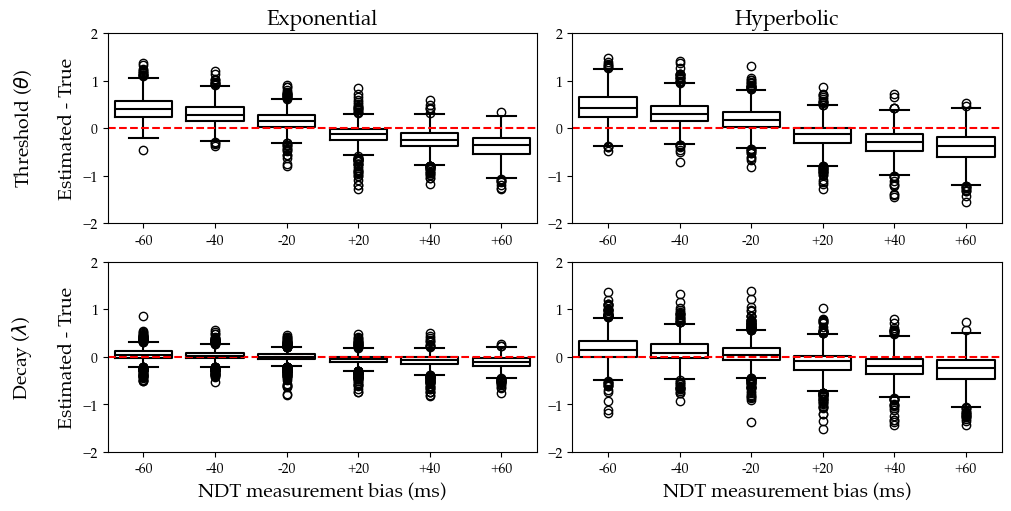

In [12]:
plt.figure(figsize=(10, 5), layout='constrained')
plt.subplot(221)
plt.title('Exponential', size=FONT_SIZE_1)
sns.boxplot(x='bias', y='diff', data=df_exp_threshold, fill=False, color='black')
plt.axhline(0, c='red', linestyle='--');
plt.ylabel(r'Threshold ($\theta$)' + '\n\nEstimated - True', size=FONT_SIZE_2)
plt.xlabel('')
plt.ylim(-2, 2)

plt.subplot(222)
plt.title('Hyperbolic', size=FONT_SIZE_1)
sns.boxplot(x='bias', y='diff', data=df_hyp_threshold, fill=False, color='black')
plt.axhline(0, c='red', linestyle='--');
plt.xlabel('')
plt.ylabel('')
plt.ylim(-2, 2)

plt.subplot(223)
sns.boxplot(x='bias', y='diff', data=df_exp_decay, fill=False, color='black')
plt.axhline(0, c='red', linestyle='--');
plt.ylabel(r'Decay ($\lambda$)' + '\n\nEstimated - True', size=FONT_SIZE_2)
plt.xlabel('NDT measurement bias (ms)', size=FONT_SIZE_2)
plt.ylim(-2, 2)

plt.subplot(224)
sns.boxplot(x='bias', y='diff', data=df_hyp_decay, fill=False, color='black')
plt.axhline(0, c='red', linestyle='--');
plt.xlabel('NDT measurement bias (ms)', size=FONT_SIZE_2);
plt.ylabel('');
plt.ylim(-2, 2);

plt.savefig(
        f'bias_boxplot.pdf',
        transparent=True, dpi=600,
        bbox_inches='tight'
    )